In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
os.chdir(r"E:\OneDrive\Desktop\4th sem\HSO201\project")
rel =pd.read_csv('RELIANCE.csv') 
tcs =pd.read_csv('TCS.csv') 
infy =pd.read_csv('INFY.csv') 
hul =pd.read_csv('HINDUNILVR.csv') 
hdfc =pd.read_csv('HDFCBANK.csv') 

In [3]:
rel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,458.404785,479.975311,454.690002,470.614044,426.631439,87644390
1,2009-05-11,475.245148,489.212738,456.423553,483.095734,437.946655,83869117
2,2009-05-18,531.709900,627.799072,517.841370,541.306458,490.717102,103763496
3,2009-05-25,544.835510,571.507690,527.623657,562.641724,510.058472,87655030
4,2009-06-01,577.030334,577.030334,534.929382,547.993103,496.778870,73702160


In [34]:
rel.describe()

,Open,High,Low,Close,Adj Close,Volume
count,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,571.335366,587.764072,556.241823,572.417658,548.579649,3.923586e+07
std,233.453430,240.716594,228.344837,235.989672,241.065992,1.727671e+07
min,335.321472,348.100342,333.365021,339.407745,314.306183,1.361037e+07
25%,430.896782,441.737778,417.727860,430.376716,406.962601,2.717088e+07
50%,492.308411,504.170959,481.349777,492.011215,462.664261,3.549132e+07
75%,540.414917,559.063126,527.097397,541.204300,512.350006,4.609215e+07
max,1379.721558,1404.189697,1353.965698,1395.620850,1382.742798,1.292719e+08


In [4]:
infy.shape

(522, 7)

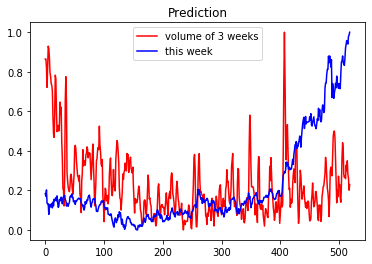

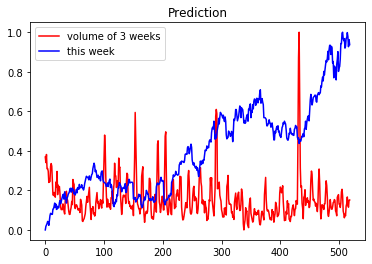

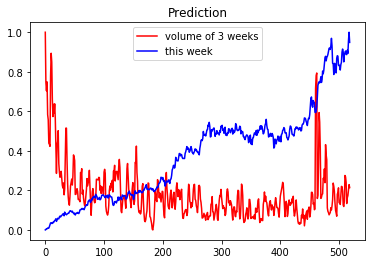

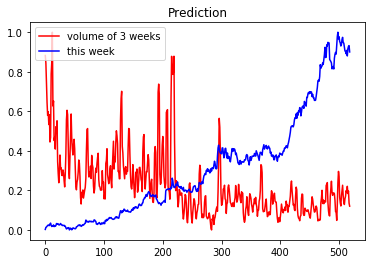

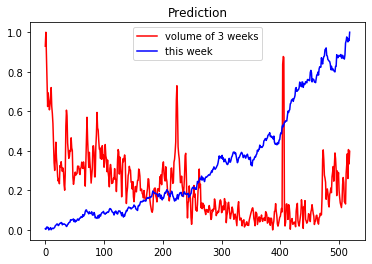

In [36]:
min_max_scaler = preprocessing.MinMaxScaler()

for co in [rel, infy, tcs, hul, hdfc] :
    X = np.zeros([519,1])
    Y = np.zeros([519,1]).astype('int')
    for i in range (0,519):
        X[i,:]=np.mean(co.loc[i:(i+2),'Volume'])
        Y[i,:]=np.array(co.loc[i+3,'Adj Close'])
    X = min_max_scaler.fit_transform(X)
    Y = min_max_scaler.fit_transform(Y)
    plt.plot(X, color = 'red', label = 'volume of 3 weeks')
    plt.plot(Y, color = 'blue', label = 'this week')
    plt.title('Prediction')
    plt.legend()
    plt.show()    

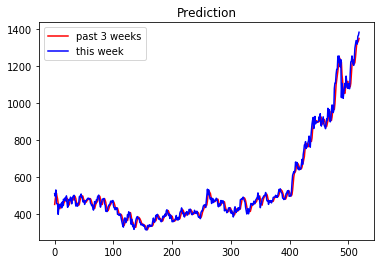

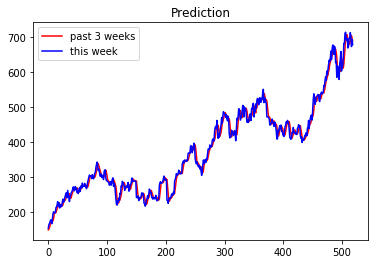

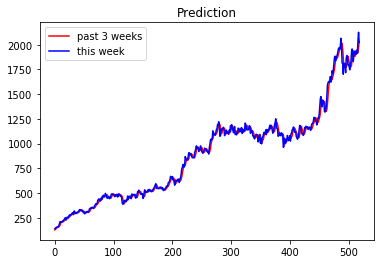

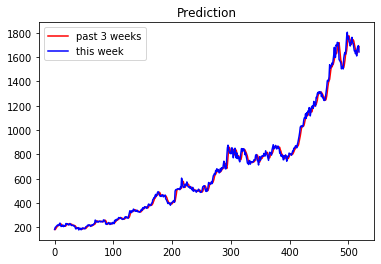

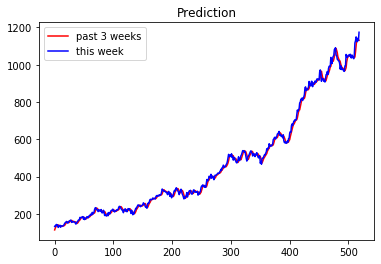

In [37]:
for co in [rel, infy, tcs, hul, hdfc] :
    X = np.zeros([519,1])
    Y = np.zeros([519,1]).astype('int')
    for i in range (0,519):
        X[i,:]=np.mean(co.loc[i:(i+2),'Adj Close'])
        Y[i,:]=np.array(co.loc[i+3,'Adj Close'])
    plt.plot(X, color = 'red', label = 'past 3 weeks')
    plt.plot(Y, color = 'blue', label = 'this week')
    plt.title('Prediction')
    plt.legend()
    plt.show()    

Epoch 1/100
42/42 [==============================] - 0s 1ms/step - loss: 549.1930
Epoch 2/100
42/42 [==============================] - 0s 981us/step - loss: 554.9680
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: 525.2598
Epoch 4/100
42/42 [==============================] - 0s 1ms/step - loss: 494.2754
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 319.7803
Epoch 6/100
42/42 [==============================] - 0s 1ms/step - loss: 138.8726
Epoch 7/100
42/42 [==============================] - 0s 1ms/step - loss: 117.9827
Epoch 8/100
42/42 [==============================] - 0s 1ms/step - loss: 103.9867
Epoch 9/100
42/42 [==============================] - 0s 921us/step - loss: 83.9585
Epoch 10/100
42/42 [==============================] - 0s 1ms/step - loss: 67.7516
Epoch 11/100
42/42 [==============================] - 0s 1ms/step - loss: 56.6484
Epoch 12/100
42/42 [==============================] - 0s 1ms/step - loss: 44.5848
Epoch 13/100


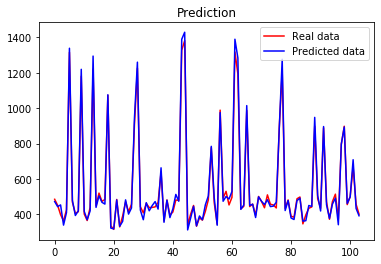

In [31]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
X = np.zeros([519,3])  
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(rel.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(rel.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim=3))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred = model.predict(X_test)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [32]:
r2 = r2_score(y_test, y_pred)
print ("R2_score : ", r2)

R2_score :  0.9905754937852655


In [3]:
def pipeline (co):
    X = np.zeros([519,3])
    Y = np.zeros([519,]).astype('int')
    for i in range (0,519):
        X[i,:]=np.array(co.loc[i:(i+2),'Adj Close'])
        Y[i,]=np.array(co.loc[i+3,'Adj Close'])
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  
    regressor = [ RandomForestRegressor(), SVR(kernel='linear'), XGBRegressor() , GaussianNB()] 
    for reg in regressor:
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        mae= sum(abs(pred - y_test) ) / len(y_test)
        rmse= np.sqrt(sum( (pred - y_test)**2 ) / len(y_test))
        r2 = r2_score(y_test, pred)
        print ("Regressor : ", reg)
        print ("MAE : ", mae)
        print ("RMSE : ", rmse)
        print ("R2_score : ", r2)
    

In [4]:
for co in [rel, infy, tcs, hul, hdfc] :
    pipeline(co)

Regressor :  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MAE :  17.060961538461537
RMSE :  22.12103245608299
R2_score :  0.9930575117502386
Regressor :  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MAE :  15.648010806575249
RMSE :  19.74591185900328
R2_score :  0.994468298259823
Regressor :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
      

In [15]:
from scipy.stats import kstest
kstest(y_test, "norm")  

KstestResult(statistic=1.0, pvalue=0.0)

In [13]:
X = np.zeros([519,3])
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(co.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(co.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
reg = SVR(kernel='linear')
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
r2 = r2_score(y_test, pred)
print ("R2_score : ", r2)

R2_score :  0.9984257988542586


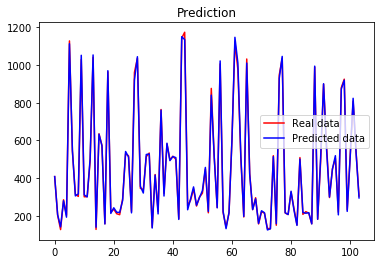

In [21]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(y_test, hist=False, color='b', label ='Actual')
sns.distplot(pred, hist=False, color='r', label = 'Predicted')
plt.show()